In [31]:
import pandas as pd

# Load the dataset (you can adjust the file path)
file_path = 'Computer_Assisted_Mass_Appraisal_-_Residential.csv'
dataset = pd.read_csv(file_path)

# Drop columns with high percentage of missing values (like 'YR_RMDL')
dataset_cleaned = dataset.drop(columns=['YR_RMDL'])
dataset_cleaned = dataset_cleaned.dropna(subset=['PRICE'])
dataset_cleaned = dataset_cleaned[(dataset_cleaned['GBA'] > 0) & (dataset_cleaned['GBA'].notna()) & (dataset_cleaned['AC'].notna()) & (dataset_cleaned['PRICE'] > 0)]

# Encode AC Y/N to 1 and 0
dataset_cleaned['AC'] = dataset_cleaned['AC'].map({'Y': True, 'N': False})

# Drop rows with missing values in 'ROOMS', 'BEDRM', 'KITCHENS', and 'FIREPLACES'
columns_to_check = ['ROOMS', 'BEDRM', 'KITCHENS', 'FIREPLACES', 'AC', 'AYB', 'STORIES']
dataset_cleaned = dataset_cleaned.dropna(subset=columns_to_check)

# For categorical columns, fill missing values with the mode (e.g., for 'STYLE', 'GRADE', etc.)
dataset_cleaned['STYLE'].fillna(dataset_cleaned['STYLE'].mode()[0], inplace=True)
dataset_cleaned['GRADE'].fillna(dataset_cleaned['GRADE'].mode()[0], inplace=True)
dataset_cleaned['STRUCT'].fillna(dataset_cleaned['STRUCT'].mode()[0], inplace=True)

# You can continue this process for other columns as needed

# Save the cleaned dataset if needed
# dataset_cleaned.to_csv('cleaned_dataset.csv', index=False)

# Check if there are any remaining missing values
print(dataset_cleaned.isnull().sum())
data = dataset_cleaned


SSL                  0
BATHRM               0
HF_BATHRM            0
HEAT                 0
HEAT_D               0
AC                   0
NUM_UNITS            0
ROOMS                0
BEDRM                0
AYB                  0
EYB                  0
STORIES              0
SALEDATE             0
PRICE                0
QUALIFIED            0
SALE_NUM             0
GBA                  0
BLDG_NUM             0
STYLE                0
STYLE_D              0
STRUCT               0
STRUCT_D             0
GRADE                0
GRADE_D              0
CNDTN                0
CNDTN_D              0
EXTWALL              0
EXTWALL_D            0
ROOF                 0
ROOF_D               0
INTWALL              0
INTWALL_D            0
KITCHENS             0
FIREPLACES           0
USECODE              0
LANDAREA             0
GIS_LAST_MOD_DTTM    0
OBJECTID             0
dtype: int64


/var/folders/k2/hq4yd_p90y1blncf07bq7dx00000gn/T/ipykernel_94845/2964698539.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset_cleaned['STYLE'].fillna(dataset_cleaned['STYLE'].mode()[0], inplace=True)
/var/folders/k2/hq4yd_p90y1blncf07bq7dx00000gn/T/ipykernel_94845/2964698539.py:21: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object 

In [32]:
# Remove extreme values based on percentiles
def remove_price_outliers(df, lower_percentile=0.025, upper_percentile=0.975):
    lower_bound = df['PRICE'].quantile(lower_percentile)
    upper_bound = df['PRICE'].quantile(upper_percentile)
    return df[(df['PRICE'] >= lower_bound) & (df['PRICE'] <= upper_bound)]

# Apply the outlier removal
dataset_cleaned = remove_price_outliers(dataset_cleaned)

# Print summary statistics of the price column before and after outlier removal
print("Before outlier removal:")
print(dataset_cleaned['PRICE'].describe())

# Remove outliers (choose one method)
dataset_cleaned = remove_price_outliers(dataset_cleaned)
# dataset_cleaned = remove_price_outliers_iqr(dataset_cleaned)

print("\nAfter outlier removal:")
print(dataset_cleaned['PRICE'].describe())

# Check if there are any remaining missing values
print("\nMissing values:")
print(dataset_cleaned.isnull().sum())

data = dataset_cleaned

# Print the number of rows removed
print(f"\nNumber of rows removed: {len(dataset) - len(data)}")

Before outlier removal:
count    5.901900e+04
mean     6.797485e+05
std      4.515880e+05
min      8.950000e+04
25%      3.300000e+05
50%      5.850000e+05
75%      9.050000e+05
max      2.360000e+06
Name: PRICE, dtype: float64

After outlier removal:
count    5.608600e+04
mean     6.595797e+05
std      3.956480e+05
min      1.129180e+05
25%      3.430800e+05
50%      5.850000e+05
75%      8.900000e+05
max      1.825000e+06
Name: PRICE, dtype: float64

Missing values:
SSL                  0
BATHRM               0
HF_BATHRM            0
HEAT                 0
HEAT_D               0
AC                   0
NUM_UNITS            0
ROOMS                0
BEDRM                0
AYB                  0
EYB                  0
STORIES              0
SALEDATE             0
PRICE                0
QUALIFIED            0
SALE_NUM             0
GBA                  0
BLDG_NUM             0
STYLE                0
STYLE_D              0
STRUCT               0
STRUCT_D             0
GRADE                

### Drop unnessary column

In [33]:
data.drop(columns=['SSL', 'BLDG_NUM', 'SALE_NUM', 'HEAT_D', 'STYLE_D', 'STRUCT_D', 'GRADE_D', 'CNDTN_D', 'EXTWALL_D', 'ROOF_D', 'INTWALL_D', 'GIS_LAST_MOD_DTTM', 'OBJECTID'], inplace=True)
data.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,...,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA
1,3.0,1.0,1.0,True,2.0,13.0,5.0,1912.0,1978,3.0,...,6.0,6.0,4.0,14.0,2.0,6.0,2.0,3.0,24,936
2,3.0,1.0,7.0,True,2.0,6.0,4.0,1910.0,1993,3.0,...,7.0,6.0,4.0,14.0,6.0,6.0,2.0,2.0,24,936
3,3.0,1.0,7.0,True,2.0,11.0,4.0,1912.0,1978,3.0,...,6.0,6.0,4.0,14.0,6.0,6.0,2.0,2.0,24,988
5,7.0,1.0,8.0,True,4.0,16.0,7.0,1895.0,1993,3.0,...,7.0,6.0,5.0,14.0,6.0,6.0,4.0,1.0,24,1674
7,4.0,1.0,8.0,True,2.0,12.0,4.0,1912.0,1997,3.0,...,7.0,7.0,6.0,14.0,6.0,6.0,2.0,1.0,24,1674


### Modify date column

In [34]:
data['SALEDATE'] = pd.to_datetime(data['SALEDATE'])

# Remove the time part, keeping only the date (this will keep Year, Month, Day)
data['SALEDATE'] = data['SALEDATE'].dt.date

# Optionally, you can extract specific components from the date for model training
data['SALE_YEAR'] = pd.DatetimeIndex(data['SALEDATE']).year
data['SALE_MONTH'] = pd.DatetimeIndex(data['SALEDATE']).month

# Drop the original 'SALEDATE' column if not needed
data = data.drop(columns=['SALEDATE'])

In [35]:
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 56086 entries, 1 to 109033
Data columns (total 26 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   BATHRM      56086 non-null  float64
 1   HF_BATHRM   56086 non-null  float64
 2   HEAT        56086 non-null  float64
 3   AC          56086 non-null  object 
 4   NUM_UNITS   56086 non-null  float64
 5   ROOMS       56086 non-null  float64
 6   BEDRM       56086 non-null  float64
 7   AYB         56086 non-null  float64
 8   EYB         56086 non-null  int64  
 9   STORIES     56086 non-null  float64
 10  PRICE       56086 non-null  float64
 11  QUALIFIED   56086 non-null  object 
 12  GBA         56086 non-null  int64  
 13  STYLE       56086 non-null  float64
 14  STRUCT      56086 non-null  float64
 15  GRADE       56086 non-null  float64
 16  CNDTN       56086 non-null  float64
 17  EXTWALL     56086 non-null  float64
 18  ROOF        56086 non-null  float64
 19  INTWALL     56086 non-null  f

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,EYB,STORIES,...,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,SALE_YEAR,SALE_MONTH
1,3.0,1.0,1.0,True,2.0,13.0,5.0,1912.0,1978,3.0,...,4.0,14.0,2.0,6.0,2.0,3.0,24,936,1999,8
2,3.0,1.0,7.0,True,2.0,6.0,4.0,1910.0,1993,3.0,...,4.0,14.0,6.0,6.0,2.0,2.0,24,936,2019,7
3,3.0,1.0,7.0,True,2.0,11.0,4.0,1912.0,1978,3.0,...,4.0,14.0,6.0,6.0,2.0,2.0,24,988,2021,10
5,7.0,1.0,8.0,True,4.0,16.0,7.0,1895.0,1993,3.0,...,5.0,14.0,6.0,6.0,4.0,1.0,24,1674,2013,12
7,4.0,1.0,8.0,True,2.0,12.0,4.0,1912.0,1997,3.0,...,6.0,14.0,6.0,6.0,2.0,1.0,24,1674,2023,5


### Feature Selection and Engineering

In [36]:
import numpy as np

# Feature Selection
numerical_features = ['BATHRM', 'HF_BATHRM', 'ROOMS', 'BEDRM', 'CNDTN', 'GRADE', 'AYB', 'EYB', 'STORIES', 'GBA', 'KITCHENS', 'FIREPLACES', 'LANDAREA', 'SALE_YEAR', 'SALE_MONTH']
categorical_features = ['HEAT', 'AC', 'STYLE', 'STRUCT', 'EXTWALL', 'ROOF', 'INTWALL', 'USECODE']

# Feature Engineering
data['AGE'] = data['SALE_YEAR'] - data['AYB']
data['TOTAL_ROOMS'] = data['ROOMS'] + data['BATHRM'] + data['HF_BATHRM']
# data['PRICE_PER_SQFT'] = data['PRICE'] / data['GBA']

# Log transform of the target variable (often helps with price predictions)
# data['LOG_PRICE'] = np.log(data['PRICE'])
data['PRICE'] = np.log(data['PRICE'])

# Update features list
numerical_features += ['AGE', 'TOTAL_ROOMS']

In [37]:
# data.to_csv('processed_dataset.csv', index=False)

### Categorical Variable Encoding

In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# 假設 data 是你的數據框，包含了之前處理過的所有數據

### Categorical Variable Encoding
X = data[numerical_features + categorical_features]
y = data['PRICE']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing pipeline
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])



In [39]:
# data.head()

### Linear Regression

In [40]:
lr_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train model
lr_model.fit(X_train, y_train)

# Predict
lr_pred = lr_model.predict(X_test)

# Evaluate model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")

evaluate_model(y_test, lr_pred, "Linear Regression")

Linear Regression Performance:
RMSE: 0.3325
R2 Score: 0.7407



### Random Forest

In [41]:
# Create model pipeline

rf_model = Pipeline([
    ('preprocessor', preprocessor),
    # ('regressor', RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1))
    ('regressor', RandomForestRegressor(n_estimators=100, max_depth=15, n_jobs=-1, random_state=42))
])

# Train model
rf_model.fit(X_train, y_train)

# Predict
rf_pred = rf_model.predict(X_test)


# Evaluate model
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.4f}")
    print(f"R2 Score: {r2:.4f}\n")

evaluate_model(y_test, rf_pred, "Random Forest")


Random Forest Performance:
RMSE: 0.2663
R2 Score: 0.8336



In [42]:
# Feature importance
feature_importance = pd.DataFrame({
    'feature': numerical_features + [f"{cf}__{val}" for cf in categorical_features for val in rf_model.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot'].categories_[categorical_features.index(cf)]],
    'importance': rf_model.named_steps['regressor'].feature_importances_
}).sort_values('importance', ascending=False)

print("Top 10 Most Important Features:")
print(feature_importance.head(10))

Top 10 Most Important Features:
       feature  importance
13   SALE_YEAR    0.371576
5        GRADE    0.272618
15         AGE    0.086017
9          GBA    0.058896
7          EYB    0.029818
6          AYB    0.028332
12    LANDAREA    0.021884
11  FIREPLACES    0.019927
0       BATHRM    0.019403
4        CNDTN    0.013691


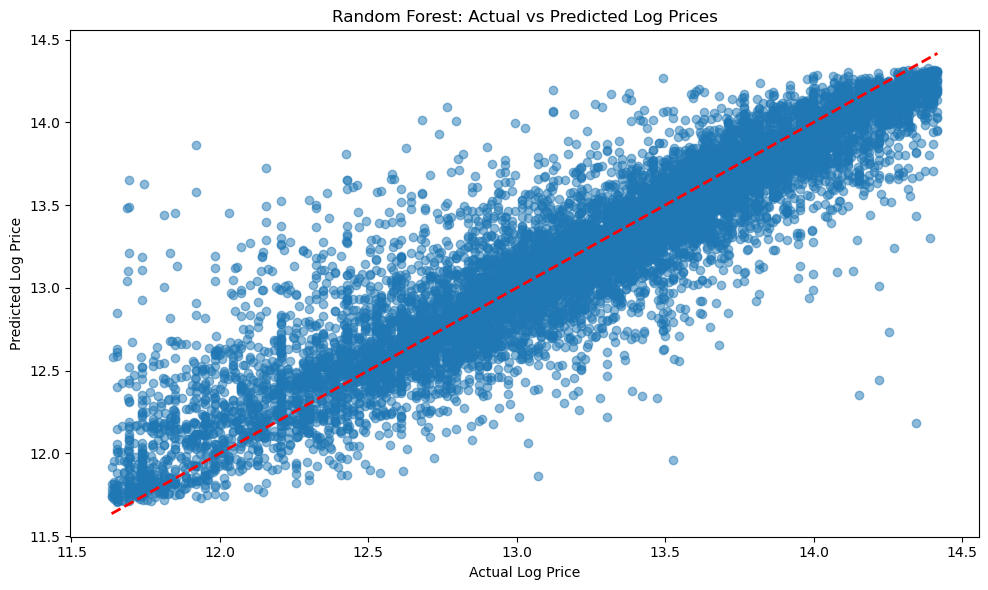

RMSE for actual prices: $165309.06


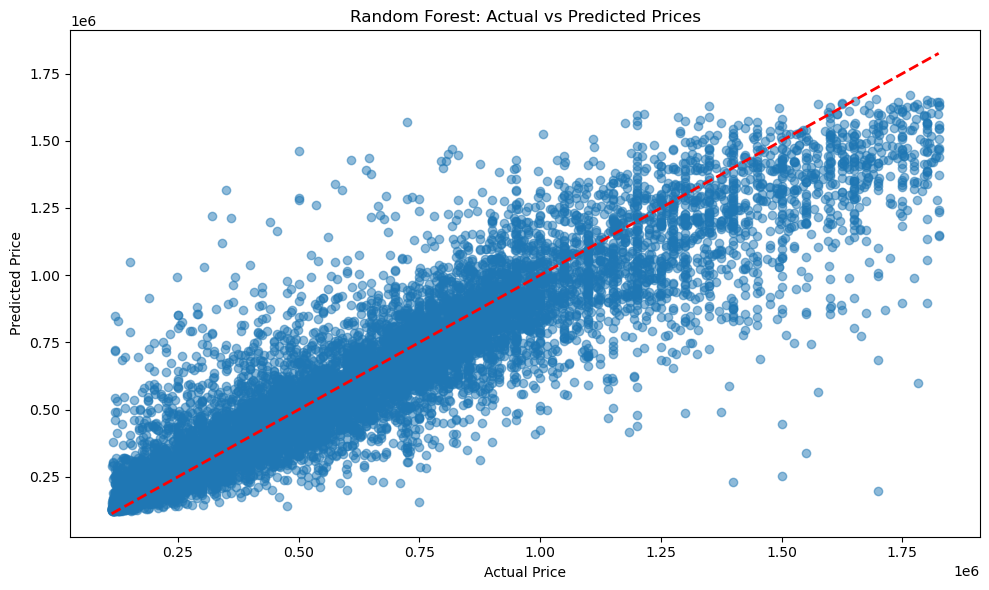

In [43]:
# 可視化預測結果
plt.figure(figsize=(10, 6))
plt.scatter(y_test, rf_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Log Price')
plt.ylabel('Predicted Log Price')
plt.title('Random Forest: Actual vs Predicted Log Prices')
plt.tight_layout()
plt.show()

# 反向轉換預測結果
rf_pred_actual = np.exp(rf_pred)
y_test_actual = np.exp(y_test)

# 計算實際價格的 RMSE
rmse_actual = np.sqrt(mean_squared_error(y_test_actual, rf_pred_actual))
print(f"RMSE for actual prices: ${rmse_actual:.2f}")

# 可視化實際價格的預測
plt.figure(figsize=(10, 6))
plt.scatter(y_test_actual, rf_pred_actual, alpha=0.5)
plt.plot([y_test_actual.min(), y_test_actual.max()], [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Random Forest: Actual vs Predicted Prices')
plt.tight_layout()
plt.show()

### Feature Scaling

### Data Splitting

### Model Training and Evaluation